Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
import numpy as np

## Q1. Preprocessing the dataset:

In [2]:
df = pd.read_csv('patient_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
## check if there are any missing values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_features] = scaler.fit_transform(df[num_features])

## Q2. Splitting the dataset:

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Q3. Training the random forest classifier:

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Q4. Evaluating the performance:

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999


## Q5. Top 5 most important features:

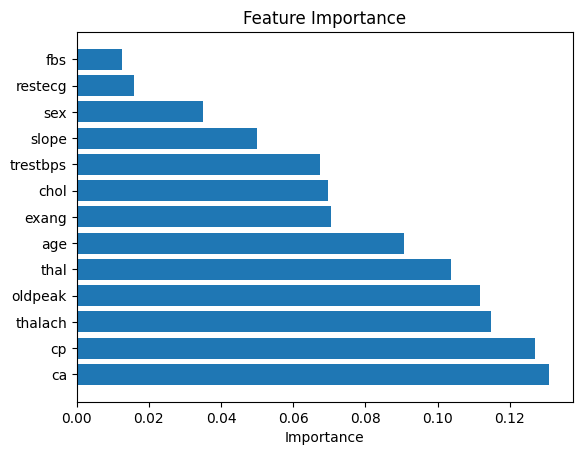

Top_5_features: ['ca', 'cp', 'thalach', 'oldpeak', 'thal']


In [9]:
import matplotlib.pyplot as plt
feature_importance = rfc.feature_importances_
feat_importance_df = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values('importance',ascending=False)
plt.barh(feat_importance_df['feature'], feat_importance_df['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
top_5_features = feat_importance_df['feature'][:5].to_list()
print("Top_5_features:",top_5_features)

## Q6. Hyperparameter tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc_tuned, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

## Q7. Model comparison:

In [ ]:
default_rfc = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
default_rfc.fit(X_train, y_train)
default_y_pred = default_rfc.predict(X_test)
tuned_rfc = grid_search.best_estimator_
tuned_rfc.fit(X_train, y_train)
tuned_y_pred = tuned_rfc.predict(X_test)
default_f1 = f1_score(y_test, default_y_pred)
tuned_f1 = f1_score(y_test, tuned_y_pred)
print('Default F1 Score:', default_f1)
print('Tuned F1 Score:', tuned_f1)

## Q8. Interpreting the model:
In general, the decision boundaries of a random forest classifier are a collection of multiple decision trees that work in unison to classify data points. The ensemble of decision trees allows the model to capture complex relationships and interactions between features.

By plotting the decision boundaries on a graph, we can see how the model separates the different classes of risk. In a scatter plot, the decision boundary is typically shown as a curve or line that separates the areas where one class of risk is more likely than the other.

Some of the limitations of the model include potential overfitting of the data, particularly if there are too many trees, and difficulty in interpreting the results due to the complex nature of decision trees. Additionally, the model may not be able to capture all variables that contribute to heart disease risk, such as lifestyle factors or genetics.

Overall, a random forest classifier can be a useful tool for predicting heart disease risk, but it should be used in conjunction with other diagnostic tools and medical expertise.